# Database Project Part 2
## Name: Mouyseang An
## INFO 3240
## 05/28/2024


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy
from sqlalchemy.engine import URL

### 1. Business Query


#### Business Query: The customer from Texas and New York want to know what kind of product that they bought, the quantity of the product and the total amount of the price.


In [27]:
driver='{ODBC Driver 17 for SQL Server}'
server='(local)'
database='MoonGlimJewelry'
trusted_connection='yes'

connection_string = f'DRIVER={driver};SERVER={server};'
connection_string += f'DATABASE={database};'
connection_string += f'TRUSTED_CONNECTION={trusted_connection}'

connection_url = URL.create( "mssql+pyodbc", query={"odbc_connect": connection_string})
connection = sqlalchemy.create_engine(connection_url)


query =""" SELECT 
    C.Customer_State, 
    P.Product_Name,
    CO.Order_Quantity, 
    SUM(P.Product_Price * CO.Order_Quantity) AS TotalAmount
FROM 
    CUSTOMER C
    INNER JOIN CUSTOMER_ORDER CO ON C.Customer_ID = CO.Customer_ID
    INNER JOIN ORDER_PRODUCT OP ON CO.Order_ID = OP.Order_ID
    INNER JOIN PRODUCT P ON P.Product_ID = OP.Product_ID
WHERE 
    C.Customer_State IN ('Texas', 'New York')
GROUP BY 
    C.Customer_State, 
    P.Product_Name, 
    CO.Order_Quantity
    
ORDER BY 
    C.Customer_State, 
    P.Product_Name;"""

df = pd.read_sql(query,connection)
df 


,Customer_State,Product_Name,Order_Quantity,TotalAmount
0,New York,Amethyst Aura Pendant,15,2700.0
1,New York,Citrine Charm Locket,28,2520.0
2,New York,Onyx Obsidian Cufflinks,19,1330.0
3,New York,Peridot Princess Necklace,27,3240.0
4,Texas,Citrine Charm Locket,7,665.0
5,Texas,Emerald Elegance Bracelet,31,5580.0
6,Texas,Pearl Perfection Brooch,43,15050.0
7,Texas,Topaz Treasure Anklet,41,4920.0


### Graph

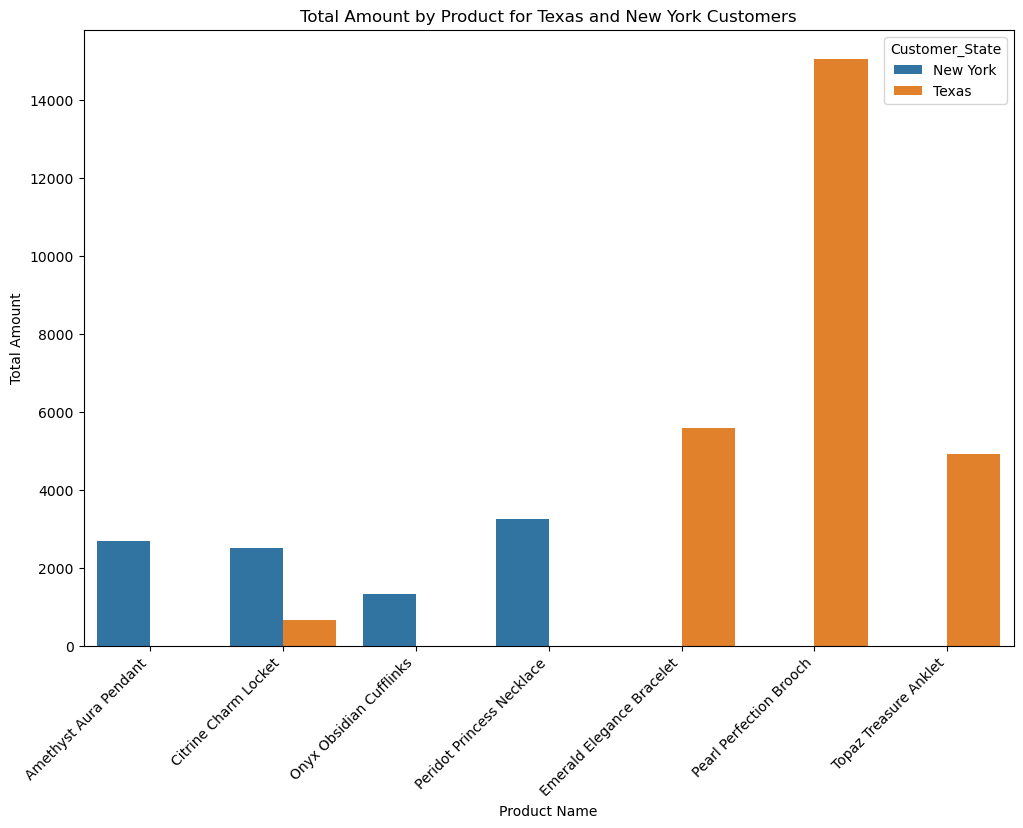

In [28]:
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(
    x='Product_Name', 
    y='TotalAmount',
    hue='Customer_State', 
    data=df)

bar_plot.set_title('Total Amount by Product for Texas and New York Customers')
bar_plot.set_xlabel('Product Name')
bar_plot.set_ylabel('Total Amount')
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()



## Statistical analysis

The groups are New York and Texas

This is a test of equal variances with Ho: The variances are equal
The t test statistic is 6.911 and the p-value is 0.0086
Conclusion: Reject Ho: The variances are not equal

This is a Welch (unequal variances) Two-Sample t test of equal means with Ho: The group means are equal
The t test statistic is -1.342 and the p-value is 0.2694
Conclusion: Fail to Reject Ho: We can't reject that the means are the same


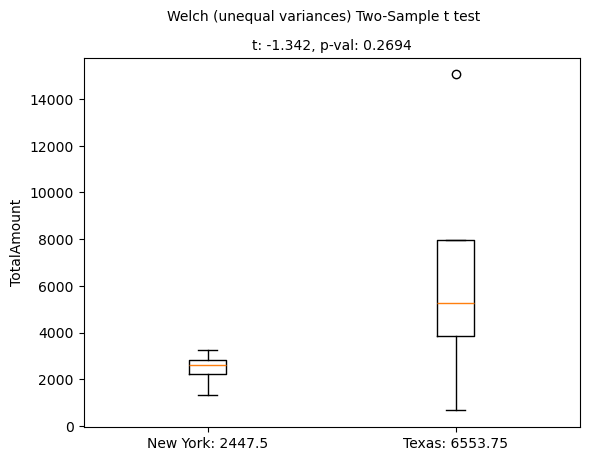

Signature: StatTests.MeansTest(df, GroupCol, MeanCol)
Docstring:
This function allows you to compare either two or multiple means. 
The output is a boxplot with appropriate
Assumes matplotlib, statsmodels, scipy has been installed

Keyword arguments:
df -- a dataframe with at least one quantitative variable for means
      and one qualitative variable with categories for comparison
GroupCol -- a name of a column in the dataframe with categories
MeanCol -- a name of a column in the dataframe with quantatitive values
           this will be used to calculate the means to compare across Groups
File:      c:\users\mouyseang.an\info 3240\labs\stattests.py
Type:      function

In [29]:
import StatTests
?StatTests.MeansTest
StatTests.MeansTest(df,'Customer_State','TotalAmount')

                            OLS Regression Results                            
Dep. Variable:            TotalAmount   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     1.800
Date:                Fri, 31 May 2024   Prob (F-statistic):              0.228
Time:                        16:14:03   Log-Likelihood:                -77.185
No. Observations:                   8   AIC:                             158.4
Df Residuals:                       6   BIC:                             158.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2

C:\Users\Mouyseang.An\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\Mouyseang.An\INFO 3240\Labs\StatTests.py:154: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  regeq = round(coefs[0],3) #first get intercept


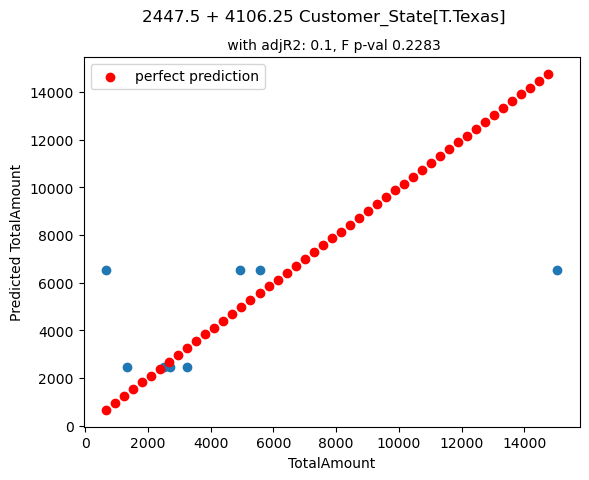

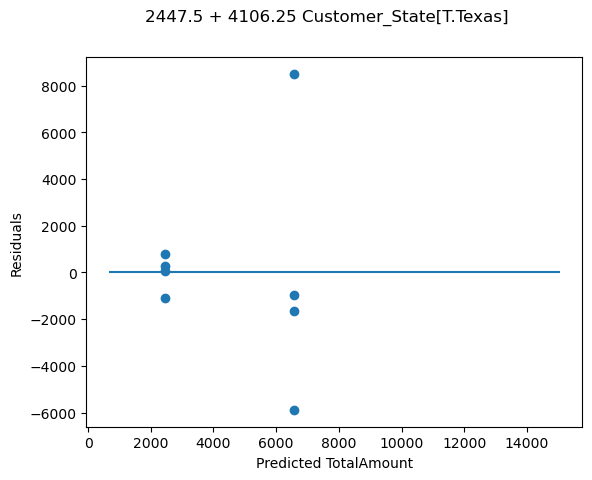

In [30]:
from statsmodels.formula.api import ols
model = ols("TotalAmount ~ Customer_State",data=df).fit()
print(model.summary())
y = df['TotalAmount']
StatTests.mult_reg(model,y)

#### Conclusion

##### The regression predicted the total amount based on the customer states that are from Texas and New york. The R-squared is 0.231 which indicated that there is 23.1% of the variability in TotalAmount is explained by the differences in Customer_State. Also,the coeefficient of the intercept of the new york is 2447.500 and for the texas is 4106.2500. The p-value of the texas is 0.228 which is above 0.05 and indicate that there is no significant different of total amount spent between these states.  

### 2. Business Query

#### Business Query: What States and revenue of month 12 and 9?

In [31]:
driver='{ODBC Driver 17 for SQL Server}'
server='(local)'
database='MoonGlimJewelry'
trusted_connection='yes'

connection_string = f'DRIVER={driver};SERVER={server};'
connection_string += f'DATABASE={database};'
connection_string += f'TRUSTED_CONNECTION={trusted_connection}'

connection_url = URL.create( "mssql+pyodbc", query={"odbc_connect": connection_string})
connection = sqlalchemy.create_engine(connection_url)


query1 ="""
SELECT
    C.Customer_State,
    DATEPART(MONTH, CO.Order_Date) AS Sale_Month,
    SUM(CO.Order_Quantity * P.Product_Price) AS Total_Revenue
FROM
    PRODUCT P
    INNER JOIN ORDER_PRODUCT OP ON P.Product_ID = OP.Product_ID
    INNER JOIN CUSTOMER_ORDER CO ON CO.Order_ID = OP.Order_ID
    INNER JOIN CUSTOMER C ON C.Customer_ID = CO.Customer_ID
WHERE
    DATEPART(MONTH, CO.Order_Date) IN (12, 9) 
GROUP BY
    C.Customer_State,
    DATEPART(MONTH, CO.Order_Date)
ORDER BY
    C.Customer_State, Sale_Month; 
"""

df1 = pd.read_sql(query1,connection)
df1

,Customer_State,Sale_Month,Total_Revenue
0,Arizona,12,13600.0
1,California,9,1190.0
2,California,12,17000.0
3,Colorado,12,3420.0
4,District of Columbia,9,1800.0
5,Florida,12,75.0
6,New Jersey,12,5060.0
7,New York,9,5760.0
8,North Carolina,9,3655.0
9,Oklahoma,9,3780.0


#### Graph


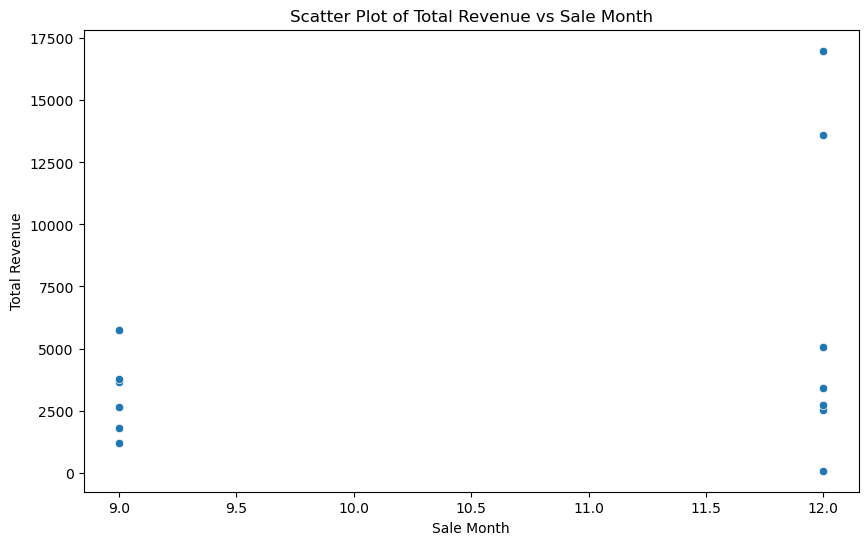

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sale_Month', y='Total_Revenue', data=df1)
plt.title('Scatter Plot of Total Revenue vs Sale Month')
plt.xlabel('Sale Month')
plt.ylabel('Total Revenue')
plt.show()

## Statistical analysis

The groups are 12 and 9

This is a test of equal variances with Ho: The variances are equal
The t test statistic is 7.203 and the p-value is 0.0073
Conclusion: Reject Ho: The variances are not equal

This is a Welch (unequal variances) Two-Sample t test of equal means with Ho: The group means are equal
The t test statistic is 1.133 and the p-value is 0.2948
Conclusion: Fail to Reject Ho: We can't reject that the means are the same


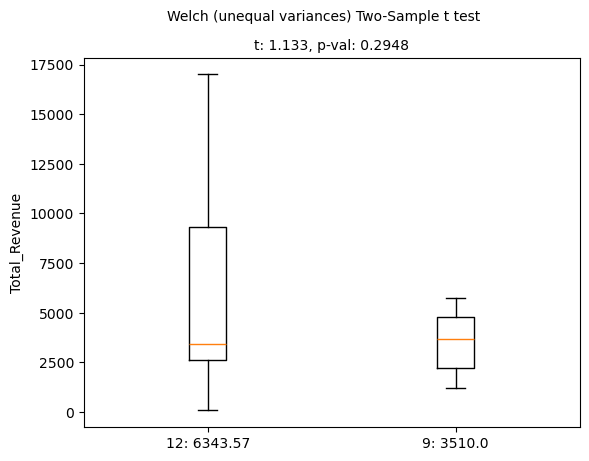

Signature: StatTests.MeansTest(df, GroupCol, MeanCol)
Docstring:
This function allows you to compare either two or multiple means. 
The output is a boxplot with appropriate
Assumes matplotlib, statsmodels, scipy has been installed

Keyword arguments:
df -- a dataframe with at least one quantitative variable for means
      and one qualitative variable with categories for comparison
GroupCol -- a name of a column in the dataframe with categories
MeanCol -- a name of a column in the dataframe with quantatitive values
           this will be used to calculate the means to compare across Groups
File:      c:\users\mouyseang.an\info 3240\labs\stattests.py
Type:      function

In [33]:
import StatTests
?StatTests.MeansTest
StatTests.MeansTest(df1,'Sale_Month','Total_Revenue')

                            OLS Regression Results                            
Dep. Variable:          Total_Revenue   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.284
Date:                Fri, 31 May 2024   Prob (F-statistic):              0.279
Time:                        16:14:07   Log-Likelihood:                -137.10
No. Observations:                  14   AIC:                             278.2
Df Residuals:                      12   BIC:                             279.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4990.7143   8842.055     -0.564      0.5

C:\Users\Mouyseang.An\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\Mouyseang.An\INFO 3240\Labs\StatTests.py:154: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  regeq = round(coefs[0],3) #first get intercept


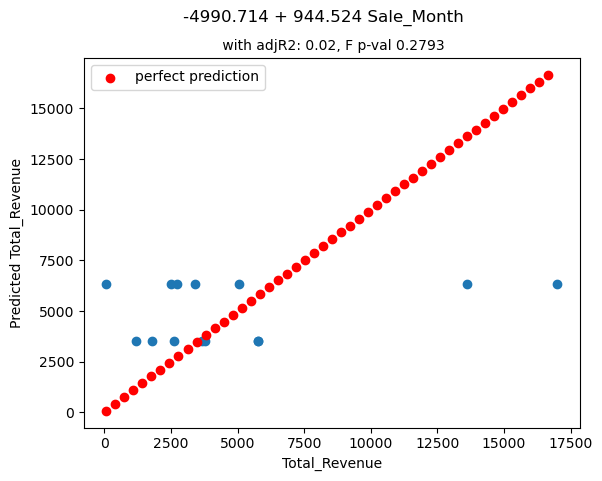

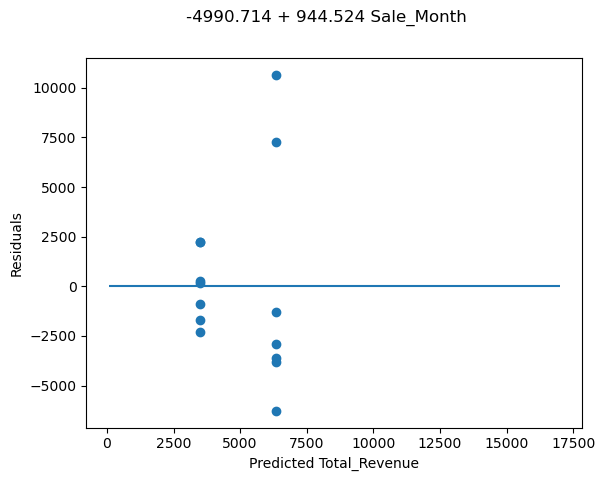

In [34]:
from statsmodels.formula.api import ols
model1 = ols("Total_Revenue ~ Sale_Month",data=df1).fit()
print(model1.summary())
y = df1['Total_Revenue']
StatTests.mult_reg(model1,y)

#### Conclusion

##### The regression predicted the total revenue based on the Sale_Month of month 9 and 12. The R-squared is 0.097 which indicated that there is 9.7% of the variability in Total revenue is explained by the different in Sale Month. Also,the coeefficient of the intercept is -4990.7143 and for the sale Month is 944.5238. The p-value of the sale month is 0.279 which is above 0.05 and indicate that there is no significant different of the total revenue by sale month.  